## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [20]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [21]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:30,2019-12-01T01:30:00+01:00,4677.0,1394.0,NaN,34.0,...,NaN,0.73,70.83,0.0,0.0,26.88,38.46,2.10,33.45,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,02:00,2019-12-01T02:00:00+01:00,4653.0,1416.0,NaN,35.0,...,NaN,0.75,72.92,0.0,0.0,27.42,39.05,2.11,33.45,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,02:15,2019-12-01T02:15:00+01:00,4797.0,1462.0,NaN,34.0,...,NaN,0.71,70.83,0.0,0.0,26.33,38.65,2.08,34.13,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,02:45,2019-12-01T02:45:00+01:00,4521.0,1114.0,NaN,35.0,...,NaN,0.77,72.92,0.0,0.0,27.96,38.68,2.19,33.79,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,04:00,2019-12-01T04:00:00+01:00,4180.0,1032.0,NaN,26.0,...,NaN,0.62,54.17,0.0,0.0,30.10,38.49,2.42,34.47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-08,18:45,2020-02-08T18:45:00+01:00,5797.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6716,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-08,20:45,2020-02-08T20:45:00+01:00,5607.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6717,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-08,22:30,2020-02-08T22:30:00+01:00,5418.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6718,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-08,22:45,2020-02-08T22:45:00+01:00,5556.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

Code INSEE région                                     int64
Région                                               object
Nature                                               object
Date                                         datetime64[ns]
Heure                                                object
Date - Heure           datetime64[ns, pytz.FixedOffset(60)]
Consommation (MW)                                   float64
Thermique (MW)                                      float64
Nucléaire (MW)                                      float64
Eolien (MW)                                         float64
Solaire (MW)                                        float64
Hydraulique (MW)                                    float64
Pompage (MW)                                        float64
Bioénergies (MW)                                    float64
Ech. physiques (MW)                                 float64
TCO Thermique (%)                                   float64
TCH Thermique (%)                       

In [23]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [24]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [25]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2019-12-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2019-12-01 01:30:00+01:00             4677.0          1394.0   
 1    2019-12-01 02:00:00+01:00             4653.0          1416.0   
 2    2019-12-01 02:15:00+01:00             4797.0          1462.0   
 3    2019-12-01 02:45:00+01:00             4521.0          1114.0   
 4    2019-12-01 04:00:00+01:00             4180.0          1032.0   
 ...                        ...                ...             ...   
 5323 2019-12-01 14:00:00+01:00             5268.0          1449.0   
 5324 2019-12-01 18:00:00+01:00             5251.0          1481.0   
 5325 2019-12-01 20:30:00+01:00             5191.0          1378.0   
 5326 2019-12-01 21:00:00+01:00             5054.0          1432.0   
 5327 2019-12-01 23:30:00+01:00             5369.0          1403.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN         34.0           0.0            1257.0   
 1  

In [26]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

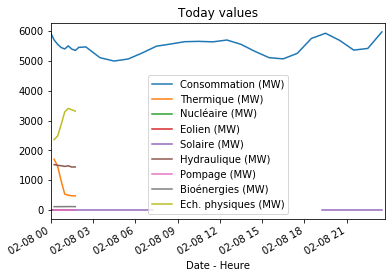

In [27]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")
# TODO: replace with : data.loc[data['Date - Heure'] == today].plot(x='Date - Heure', title="Today values")

In [28]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [29]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

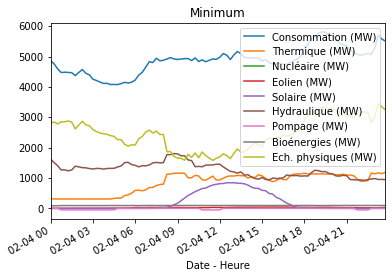

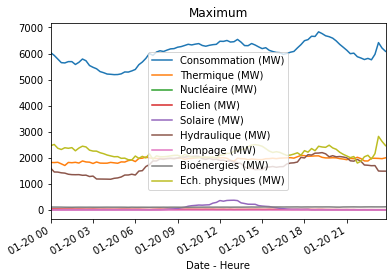

In [30]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [31]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5366.443816
Thermique (MW)         1130.621375
Nucléaire (MW)                 NaN
Eolien (MW)              12.375739
Solaire (MW)            111.949827
Hydraulique (MW)       1444.062396
Pompage (MW)             -5.652649
Bioénergies (MW)        107.409746
Ech. physiques (MW)    2554.205708
TCO Thermique (%)        20.751687
TCH Thermique (%)        34.487999
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.235389
TCH Eolien (%)           25.782616
TCO Solaire (%)           2.070412
TCH Solaire (%)           8.633460
TCO Hydraulique (%)      26.886892
TCH Hydraulique (%)      44.191148
TCO Bioénergies (%)       2.016484
TCH Bioénergies (%)      36.658699
Column 26                      NaN
dtype: float64

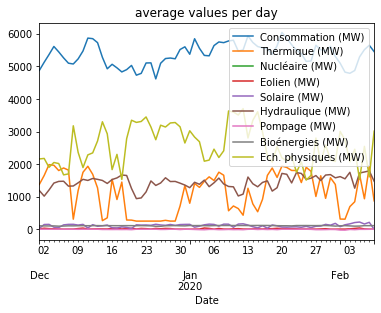

In [32]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

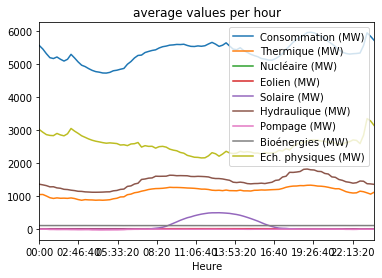

In [33]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

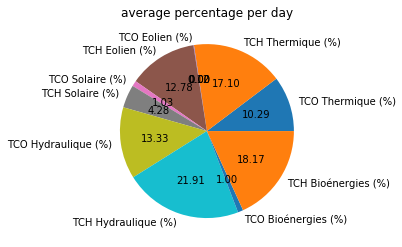

In [34]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')